In [63]:
# Import libraries

import math

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import yfinance as yf

from matplotlib.pyplot import figure
import scipy.stats as stats 

import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

import pylab
from statsmodels.tsa.stattools import adfuller
import pylab


In [33]:
# Can choose any stock

VGT_df = yf.download('VGT', start = '2014-01-01', end = '2022-04-15', progress = False)

In [34]:
VGT_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,89.099998,89.580002,89.080002,89.540001,82.474739,428500
2014-01-02,89.160004,89.160004,88.430000,88.620003,81.627312,358100
2014-01-03,88.760002,88.779999,88.199997,88.320000,81.350998,829500
2014-01-06,88.379997,88.430000,87.820000,88.070000,81.120712,386300
2014-01-07,88.500000,89.099998,88.300003,88.959999,81.940498,317000
...,...,...,...,...,...,...
2022-04-08,401.489990,402.250000,396.660004,397.649994,397.649994,444300
2022-04-11,392.540009,392.880005,387.890015,388.230011,388.230011,499800
2022-04-12,393.980011,396.850006,385.540009,387.170013,387.170013,2719400


In [35]:
# username = 'boonkiat1989'
# api_key = 'SxfY5mKNxlBzqnQOjFzj'
# tls.set_credentials_file(username =username, api_key = api_key)
# py.plot(fig1, filename ='VGT-TS-plot', auto_open = False)

In [36]:
simple_returns = VGT_df.Close.pct_change().dropna()
simple_returns

Date
2014-01-02   -0.010275
2014-01-03   -0.003385
2014-01-06   -0.002831
2014-01-07    0.010106
2014-01-08    0.001237
                ...   
2022-04-08   -0.014669
2022-04-11   -0.023689
2022-04-12   -0.002730
2022-04-13    0.017434
2022-04-14   -0.024726
Name: Close, Length: 2087, dtype: float64

In [37]:
m =simple_returns.mean()
m1 = simple_returns.mode()
m2 = simple_returns.median()

print(f'Mean: {m}')
print(f'Mode: {m1}')
print(f'Median: {m2}')

Mean: 0.0007943870522762759
Mode: 0    0.0
Name: Close, dtype: float64
Median: 0.0013314104634460922


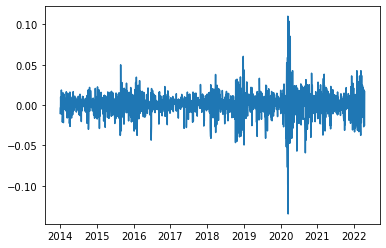

In [38]:
plt.plot(simple_returns)
plt.show()

<AxesSubplot:ylabel='Frequency'>

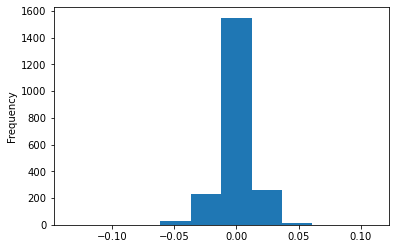

In [39]:
simple_returns.plot(kind='hist')

Q-Q Plot


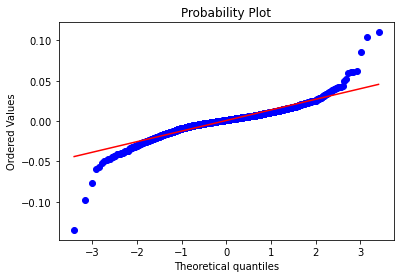

In [65]:
stats.probplot(simple_returns, dist='norm', plot=pylab)
print('Q-Q Plot')

<AxesSubplot:>

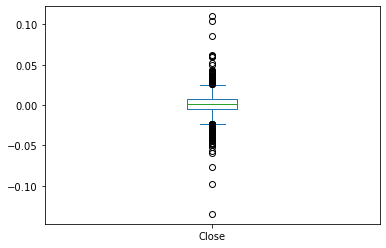

In [66]:
simple_returns.plot(kind='box')

In [40]:
VGT_df.Close[0] * np.prod( [(1 + Rt) for Rt in simple_returns] )
log_returns = np.log(VGT_df.Close/VGT_df.Close.shift(1)).dropna()
VGT_df.Close[0] * np.exp(log_returns.mean() * len(log_returns))

384.1799926757806

In [62]:
lm =log_returns.mean()
lm1 = log_returns.mode()
lm2 = log_returns.median()

print(f'Mean: {lm}')
print(f'Mode: {lm1}')
print(f'Median: {lm2}')

Mean: 0.0006978561143539093
Mode: 0    0.0
Name: Close, dtype: float64
Median: 0.0013305249224602146


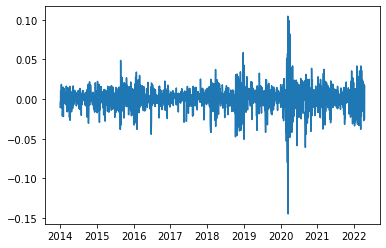

In [41]:
plt.plot(log_returns)
plt.show()

<AxesSubplot:ylabel='Frequency'>

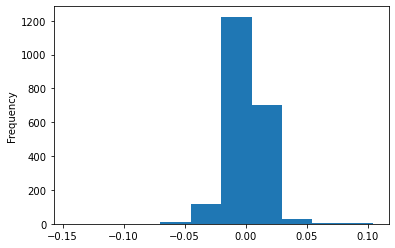

In [42]:
log_returns.plot(kind='hist') #.update_layout(autosize = False, width=500, height=300)

In [61]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

std_worst = (worst - log_returns.mean())/log_returns.std()
std_best = (best - log_returns.mean())/log_returns.std()

print('Std dev. worst %.2f best %.2f' %(std_worst, std_best))
print('Probability worst %.25f best %.13f' %(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))

Std dev. worst -10.48 best 7.47
Probability worst 0.0000000000000000000000006 best 0.0000000000003


Q-Q Plot


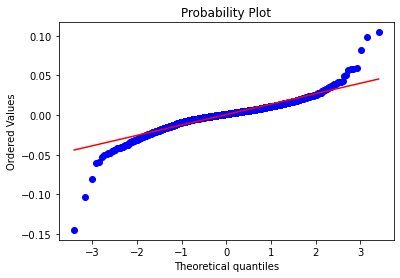

In [64]:
stats.probplot(log_returns, dist='norm', plot=pylab)
print('Q-Q Plot')

<AxesSubplot:>

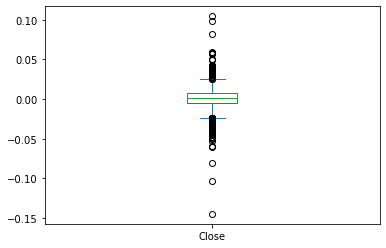

In [45]:
log_returns.plot(kind='box')

In [67]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print(f'ks_stat: {ks_stat}, p_value: {p_value}')
if p_value > 0.05:
    print('Probably Guassian')
else:
    print('Probably NOT Guassian')

ks_stat: 0.47871176849303665, p_value: 0.0
Probably NOT Guassian


In [68]:
sw_stat, p_value = stats.shapiro(log_returns)
print(f'sw_stat: {sw_stat}, p_value: {p_value}')
if p_value > 0.05:
    print('Probably Guassian')
else:
    print('Probably NOT Guassian')

sw_stat: 0.8971880078315735, p_value: 2.87739808821402e-35
Probably NOT Guassian


In [48]:
x = VGT_df['Close'].values
result = adfuller(x)
print('ADF Statisitic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key,value))

if result[0] < result[4]['5%']:
    print('Time Series is Stationary')
else:
    print('Time Series is Non-Stationary')

ADF Statisitic: 0.287946
p-value: 0.976785
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Time Series is Non-Stationary


In [49]:
df= VGT_df['Close']

df_diff = df.diff().dropna()

In [50]:
result1 = adfuller(df_diff)
print('ADF Statisitic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' %(key,value))

if result1[0] < result1[4]['5%']:
    print('Time Series is Stationary')
else:
    print('Time Series is Non-Stationary')

ADF Statisitic: -11.794485
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Time Series is Stationary


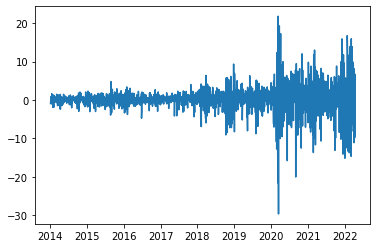

In [51]:
plt.plot(df_diff)
plt.show()